<a href="https://colab.research.google.com/github/Sayali-1902/Gradient-Gains-BCS-Winter-project-2025-/blob/main/%7B250380%7D_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
uploads = files.upload()

Saving Dataset_2 - Sheet1.csv to Dataset_2 - Sheet1.csv


In [ ]:
df = pd.read_csv("Dataset_2 - Sheet1.csv")
df.head()

,Employee ID,Income,Gender,Department,Team
0,1,46000,F,Finance,A
1,2,39000,M,Finance,B
2,3,41000,M,Software,A
3,4,33000,M,Software,B
4,5,30000,F,HR,A


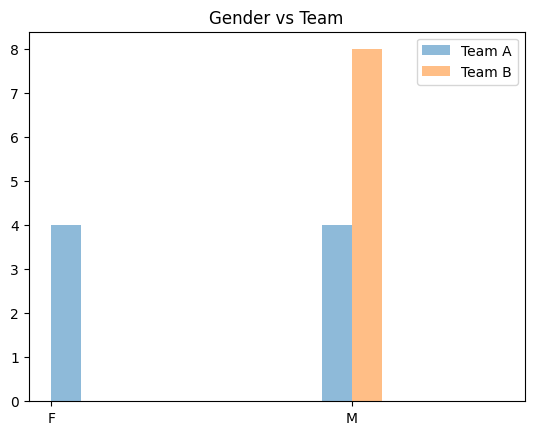

In [ ]:
plt.hist(df[df["Team"]=="A"]["Gender"], alpha=0.5, label="Team A")
plt.hist(df[df["Team"]=="B"]["Gender"], alpha=0.5, label="Team B")
plt.legend()
plt.title("Gender vs Team")
plt.show()

In [ ]:
def gini(y):
    p = y.value_counts(normalize=True)
    return 1 - (p**2).sum()

gini_parent = gini(df['Team'])

left = df[df['Gender']=="M"]['Team']
right = df[df['Gender']=="F"]['Team']

gini_split = (
    len(left)/len(df)*gini(left) +
    len(right)/len(df)*gini(right)
)

print(gini_parent, gini_split)

0.5 0.3333333333333333


In [ ]:
left2_df = df[df['Gender'] =="M"]
right2_df = df[df['Gender'] >= "F"]

# right_df contains only Team A members.

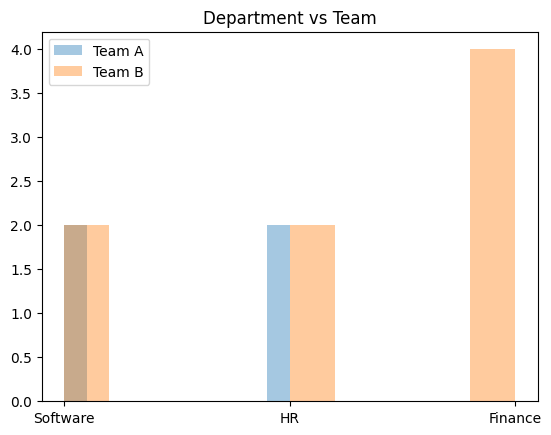

In [ ]:
plt.hist(left2_df[left2_df["Team"]=="A"]["Department"], alpha=0.4, label="Team A")
plt.hist(left2_df[left2_df["Team"]=="B"]["Department"], alpha=0.4, label="Team B")
plt.legend()
plt.title("Department vs Team")
plt.show()

In [ ]:
left = left2_df[left2_df["Department"]!="Finance"]["Team"]
right = left2_df[left2_df["Department"]=="Finance"]["Team"]

gini_split = (
    len(left)/len(left2_df)*gini(left) +
    len(right)/len(df)*gini(right)
)

print(gini_parent, gini_split)

0.5 0.3333333333333333


In [ ]:
right3_left2_df = left2_df[left2_df["Department"]=="Finance"]
left3_left2_df = left2_df[left2_df["Department"]!="Finance"]

#right3_left2_df is purely Team B

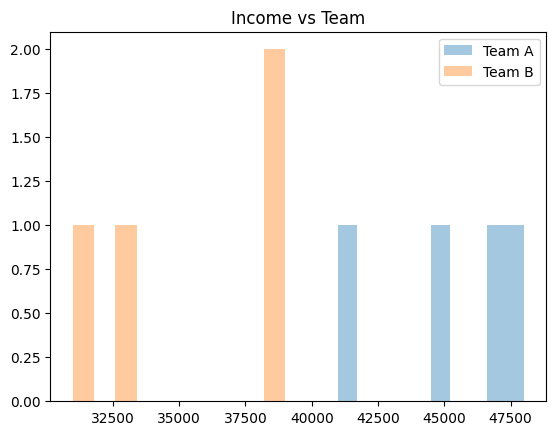

In [ ]:
plt.hist(left3_left2_df[left3_left2_df["Team"]=="A"]["Income"], alpha=0.4, label="Team A")
plt.hist(left3_left2_df[left3_left2_df["Team"]=="B"]["Income"], alpha=0.4, label="Team B")
plt.legend()
plt.title("Income vs Team")
plt.show()

In [ ]:
left = left3_left2_df[left3_left2_df["Income"] < 40000]["Team"]
right = left3_left2_df[left3_left2_df["Income"] >= 40000]["Team"]

gini_split = (
    len(left)/len(left2_df)*gini(left) +
    len(right)/len(df)*gini(right)
)

print(gini_parent, gini_split)

0.5 0.0


In [ ]:
left1_left3_left2_df = left3_left2_df[left3_left2_df["Income"] < 40000]
right1_left3_left2_df = left3_left2_df[left3_left2_df["Income"] >= 40000]

# now, left1_left3_left2_df is purely Team B and right1_left3_left2_df is purely Team A :)

In [ ]:
# Now we can finally build our classifier!


x1 = int(input("Enter Income: "))
x2 = input("Enter Gender M/F: ")
x3 = input("Enter Department: ")
def classifier(x1, x2, x3):
  if (x2 == "F"):
    return "Team A"
  else:
    if(x3=="Finance"):
      return "Team B"
    else:
      if(x1<40000):
        return "Team B"
      else:
        return "Team A"
team = classifier(x1,x2,x3)
print("Assigned team:", team)


Enter Income: 45000
Enter Gender M/F: M
Enter Department: HR
Assigned team: Team A
